In [1]:
from IPython.display import Image 
from tqdm import tqdm_notebook

In [2]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(888)  # for reproducibility

C:\Python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# # Predicting animal type based on various features
# # xy = np.loadtxt('data/train5.csv', delimiter=',', dtype=np.float32)
# xy = np.loadtxt('data/train_householder2.csv', delimiter=',', dtype=np.float32)

In [4]:
# # ML202-Softmax_Classifier 참고!!

# x_data = xy[:, 0:-1]
# y_data = xy[:, [-1]]

# print(x_data.shape, y_data.shape)
# print('\nx_data :\n', x_data)
# print('\ny_data :\n', y_data)

# nb_classes = 4  # 0~3

# X = tf.placeholder(tf.float32, [None, 111])
# Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 3

# Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
# print("\none_hot", Y_one_hot)

# Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
# print("\nreshape", Y_one_hot)

# W = tf.Variable(tf.random_normal([111, nb_classes]), name='weight')
# b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# # tf.nn.softmax computes softmax activations
# # softmax = exp(logits) / reduce_sum(exp(logits), dim)
# logits = tf.matmul(X, W) + b
# hypothesis = tf.nn.softmax(logits)

# # Cross entropy cost/loss
# cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
#                                                  labels=Y_one_hot)
# cost = tf.reduce_mean(cost_i)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# prediction = tf.argmax(hypothesis, 1)
# correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
# # Launch the graph in a session.
# sess = tf.Session()

# # Initializes global variables in the graph.
# sess.run(tf.global_variables_initializer())

# for step in range(10001):
#     sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
#     if step % 1000 == 0 or step < 10:
#         loss, acc = sess.run([cost, accuracy], feed_dict={
#                              X: x_data, Y: y_data})
#         print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
#             step, loss, acc))

In [6]:
# # Let's see if we can predict
# pred = sess.run(prediction, feed_dict={X: x_data})

# # y_data: (N,1) = flatten => (N, ) matches pred.shape
# for p, y in zip(pred, y_data.flatten()):
#     print("[{}]  Prediction : {},  True Y : {}".format(p == int(y), p, int(y)))
#     # print("[{}]  Prediction : {},  True Y : {}, y_data : {}".format(p == int(y), p, int(y), y_data))

In [7]:
# # Launch graph
# with tf.Session() as sess:
#     # Initialize TensorFlow variables
#     sess.run(tf.global_variables_initializer())

#     for step in tqdm_notebook(range(201)):
#         cost_val, W_val, _ = sess.run(
#             [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
#         if step%20 == 0:
#             print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

#     print("-"*60)
#     # predict
#     print("Prediction \t:", sess.run(prediction, feed_dict={X: x_data}))
#     # Calculate the accuracy
#     print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_data, Y: y_data}))

In [8]:
# ML511-Softmax_for_MNIST 참고!!

In [9]:
# # Review : Learning rate and Evaluation
# import tensorflow as tf
# import random
# import matplotlib.pyplot as plt

# xy = np.loadtxt('data/train_householder3.csv', delimiter=',', dtype=np.float32)
# x_data = xy[:, 0:-4]
# y_data = xy[:, -4:]

# tf.set_random_seed(999)  # reproducibility


# # parameters
# learning_rate = 0.001



# X = tf.placeholder(tf.float32, [None, 111])
# Y = tf.placeholder(tf.float32, [None, 4])

# # weights & bias for nn layers
# W = tf.Variable(tf.random_normal([111, 4]))
# b = tf.Variable(tf.random_normal([4]))

# hypothesis = tf.matmul(X, W) + b

# # define cost/loss & optimizer
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#     logits=hypothesis, labels=Y))
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
# # Launch the graph in a session.
# sess = tf.Session()

# # Initializes global variables in the graph.
# sess.run(tf.global_variables_initializer())

# for step in range(10001):
#     sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
#     if step % 1000 == 0 or step < 10:
#         loss, acc = sess.run([cost, accuracy], feed_dict={
#                              X: x_data, Y: y_data})
#         print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
#             step, loss, acc))

In [11]:
# 샤비어

In [12]:
def xavier_init(n_inputs, n_outputs, uniform=True):
    if uniform:
        # 6 was used in the paper.
        init_range = tf.sqrt(6.0 / (n_inputs + n_outputs))
        return tf.random_uniform_initializer(-init_range, init_range)
    else:
        # 3 gives us approximately the same limints as above since this repicks
        # values greater than 2 standard deviations from the mean.
        stddev = tf.sqrt(3.0 / (n_inputs + n_outputs))
        return tf.truncated_normal_initializer(stddev=stddev)

In [14]:
# Review : Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

xy = np.loadtxt('data/train_householder3.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-4]
y_data = xy[:, -4:]

tf.set_random_seed(999)  # reproducibility


# parameters
learning_rate = 0.001



X = tf.placeholder(tf.float32, [None, 111])
Y = tf.placeholder(tf.float32, [None, 4])

W1 = tf.get_variable("W1", shape=[111, 64],
                     initializer=xavier_init(111, 64))
b1 = tf.Variable(tf.random_normal([64]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[64, 64],
                     initializer=xavier_init(64, 64))
b2 = tf.Variable(tf.random_normal([64]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[64, 4],
                     initializer=xavier_init(64, 4))
b3 = tf.Variable(tf.random_normal([4]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(1001):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0 or step < 10:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))

Step:     0, 	 Loss: 1.413, 	 Acc: 49.11%
Step:     1, 	 Loss: 1.278, 	 Acc: 60.98%
Step:     2, 	 Loss: 1.219, 	 Acc: 65.02%
Step:     3, 	 Loss: 1.190, 	 Acc: 65.69%
Step:     4, 	 Loss: 1.168, 	 Acc: 65.79%
Step:     5, 	 Loss: 1.145, 	 Acc: 65.86%
Step:     6, 	 Loss: 1.120, 	 Acc: 65.86%
Step:     7, 	 Loss: 1.094, 	 Acc: 65.99%
Step:     8, 	 Loss: 1.067, 	 Acc: 66.09%
Step:     9, 	 Loss: 1.040, 	 Acc: 66.06%
Step:  1000, 	 Loss: 0.071, 	 Acc: 99.29%


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_x = pd.DataFrame(x_data)
df_x

0    1    2    3    4    5    6    7    8    9   ...   101  102  103  \
0     0.0  3.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  1.0  1.0   
1     0.0  4.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0 ...   1.0  1.0  1.0   
2     0.0  8.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0   
3     0.0  5.0  0.0  1.0  1.0  1.0  1.0  0.0  2.0  2.0 ...   1.0  3.0  1.0   
4     1.0  2.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  1.0  1.0   
5     0.0  3.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  1.0   
6     0.0  4.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0 ...   1.0  1.0  1.0   
7     1.0  2.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  1.0  1.0   
8     0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
9     0.0  3.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  1.0  1.0   
10    1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  3.0  1.0   
11    0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
12    0.0  4.0  0.0  1.0  1.0  1.0  1.0  0.0  2.0  2.0 ...   1.0  3.0  1.0   
13    0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
14    0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  4.0  4.0 ...   1.0  3.0  1.0   
15    0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  2.0  1.0   
16    0.0  5.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
17    0.0  8.0  0.0  1.0  1.0  1.0  1.0  0.0  2.0  2.0 ...   1.0  3.0  1.0   
18    0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  1.0  1.0   
19    0.0  5.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
20    0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
21    0.0  5.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  2.0 ...   1.0  2.0  1.0   
22    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0 ...   0.0  0.0  1.0   
23    0.0  3.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  1.0   
24    0.0  6.0  0.0  1.0  1.0  1.0  2.0  0.0  2.0  2.0 ...   1.0  3.0  1.0   
25    0.0  6.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  1.0   
26    0.0  3.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  2.0 ...   1.0  5.0  1.0   
27    0.0  6.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  2.0 ...   1.0  2.0  1.0   
28    0.0  6.0  0.0  1.0  1.0  1.0  3.0  0.0  1.0  1.0 ...   1.0  4.0  1.0   
29    0.0  6.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  2.0 ...   1.0  2.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...   
2943  0.0  4.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  2.0 ...   1.0  3.0  0.0   
2944  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  1.0  0.0   
2945  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  0.0   
2946  0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  0.0   
2947  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  2.0  0.0   
2948  0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0   
2949  0.0  2.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0 ...   1.0  3.0  0.0   
2950  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  2.0  0.0   
2951  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  3.0  0.0   
2952  0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  0.0   
2953  0.0  7.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0 ...   1.0  2.0  0.0   
2954  0.0  5.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2955  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  2.0  0.0   
2956  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  1.0  0.0   
2957  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  0.0   
2958  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0  2.0 ...   1.0  2.0  0.0   
2959  0.0  3.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  2.0  0.0   
2960  0.0  8.0  0.0  1.0  1.0  1.0  1.0  0.0  2.0  2.0 ...   1.0  3.0  0.0   
2961  0.0  4.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0 ...   1.0  2.0  0.0   
2962  0.0  1.0  0.0  1.0  1.

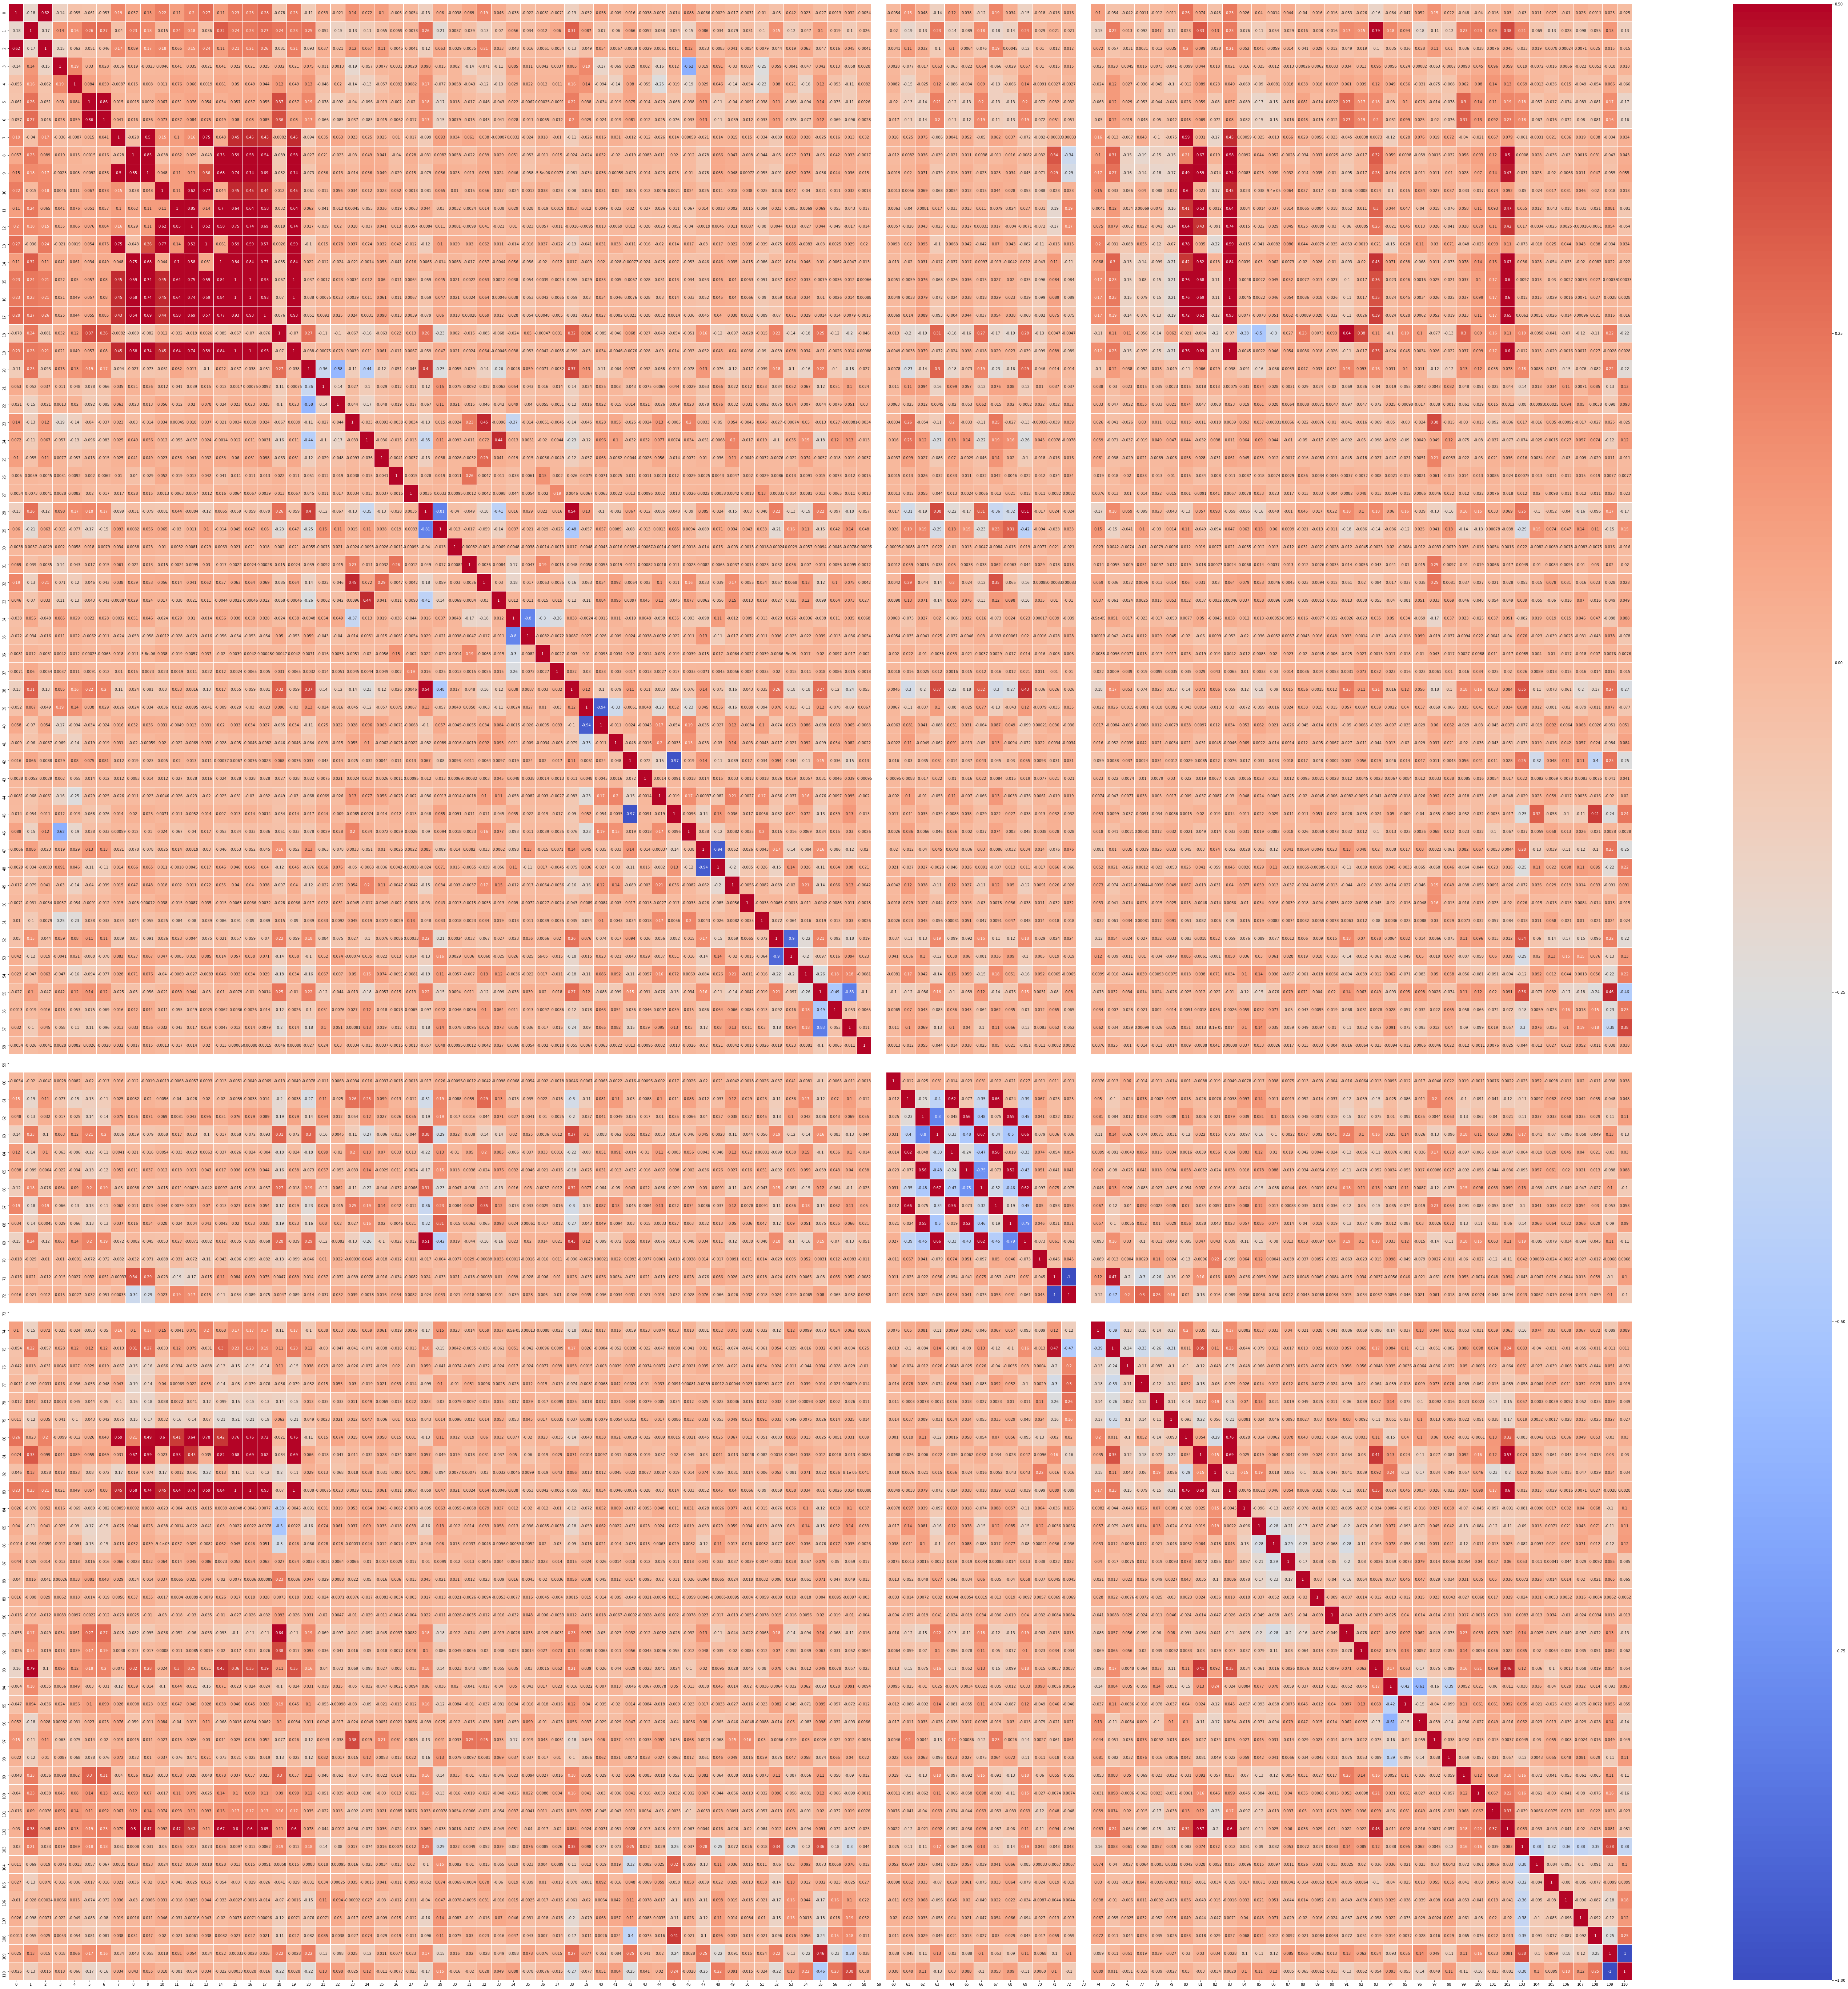

In [28]:
plt.figure(figsize=(100, 100))

# Heatmap 설정
sns.heatmap(df_x.corr(), linewidths=0.1, vmax=0.5, cmap="coolwarm",
            linecolor='white', annot=True)

# 렌더링
plt.show()